# Latent Dirichlet Allocation

### Objective

1) Train LDAModel on data.csv to find hidden latent topics and assigning topics to the documents. <br>
2) Documents are clustered based on keywords.<br>
3) Whenever user search for query documents retrieved on the basis of topic_document_matrix. <br>

In [1]:
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [3]:
df = pd.read_csv("./datasets/data.csv")

In [4]:
df.head()

,Unnamed: 0,project,data,file
0,0,integrated spice modeling/simulation of circui...,integrated spice modeling simulation circuit s...,./reports_doc/1.pdf
1,1,secure online payment system using data hiding...,secure online payment hiding technique shruti ...,./reports_doc/102.pdf
2,2,face detection and recognisation based attenda...,face detection recognisation attendance tanmay...,./reports_doc/103.pdf
3,3,3d image scanner,3d image scanner nangare akshay arun rakshe ve...,./reports_doc/18.pdf
4,4,attendance management system using face recogn...,phase attendance face recognition sayali devad...,./reports_doc/22.pdf


In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.head()

,project,data,file
0,integrated spice modeling/simulation of circui...,integrated spice modeling simulation circuit s...,./reports_doc/1.pdf
1,secure online payment system using data hiding...,secure online payment hiding technique shruti ...,./reports_doc/102.pdf
2,face detection and recognisation based attenda...,face detection recognisation attendance tanmay...,./reports_doc/103.pdf
3,3d image scanner,3d image scanner nangare akshay arun rakshe ve...,./reports_doc/18.pdf
4,attendance management system using face recogn...,phase attendance face recognition sayali devad...,./reports_doc/22.pdf


In [7]:
%%time
documents = list(df['data'].apply(word_tokenize))

Wall time: 6.93 s


In [8]:
# Create Dictionary
id2word = Dictionary(documents)

In [9]:
%%time
corpus = [id2word.doc2bow(text) for text in documents]

Wall time: 683 ms


In [10]:
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 2), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 2), (24, 2), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 4), (33, 3), (34, 1), (35, 6), (36, 1), (37, 3), (38, 1), (39, 3), (40, 1), (41, 2), (42, 1), (43, 1), (44, 3), (45, 1), (46, 3), (47, 1), (48, 1), (49, 2), (50, 1), (51, 3), (52, 1), (53, 2), (54, 2), (55, 1), (56, 1), (57, 2), (58, 1), (59, 2), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 2), (70, 4), (71, 1), (72, 1), (73, 2), (74, 1), (75, 3), (76, 2), (77, 1), (78, 1), (79, 9), (80, 1), (81, 5), (82, 1), (83, 1), (84, 1), (85, 3), (86, 57), (87, 1), (88, 2), (89, 9), (90, 1), (91, 1), (92, 1), (93, 1), (94, 2), (95, 1), (96, 1), (97, 1), (98, 2), (99, 1), (100, 1), (101, 1), (102, 1), (103, 1), (104, 3), (105, 2), (106, 2), (107, 10), (108, 1), (109, 3), (110, 

In [11]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('01jan1989', 1),
  ('0v', 1),
  ('10ghz', 1),
  ('10hz', 2),
  ('16f84', 2),
  ('1ghz', 1),
  ('1mhz', 2),
  ('1v', 2),
  ('22nm', 1),
  ('25sep2014', 1),
  ('30jun2017', 1),
  ('32bit', 1),
  ('32nm', 1),
  ('35um', 1),
  ('45nm', 3),
  ('abbreviation', 1),
  ('ability', 1),
  ('access', 1),
  ('account', 1),
  ('achieved', 1),
  ('acknowledged', 1),
  ('acknowledgement', 1),
  ('acronym', 2),
  ('actual', 2),
  ('add', 2),
  ('adding', 1),
  ('addition', 1),
  ('additional', 2),
  ('addressing', 1),
  ('advantage', 1),
  ('aid', 1),
  ('allen', 1),
  ('allows', 4),
  ('analog', 3),
  ('analyse', 1),
  ('analyze', 6),
  ('analyzed', 1),
  ('analyzing', 3),
  ('andrei', 1),
  ('android', 3),
  ('apis', 1),
  ('app', 2),
  ('appreciated', 1),
  ('appreciation', 1),
  ('approach', 3),
  ('apps', 1),
  ('asic', 3),
  ('aspect', 1),
  ('aspire', 1),
  ('assembly', 2),
  ('assistance', 1),
  ('automation', 3),
  ('aware', 1),
  ('backend', 2),
  ('background', 2),
  ('banzhaf', 1),
  ('b

In [12]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        print("Training with topic: {}".format(num_topics))
        model = LdaModel(corpus=corpus, num_topics=num_topics, random_state=100, update_every=1, id2word=id2word, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [13]:
%%time
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=documents, start=2, limit=20, step=1)

Training with topic: 2
Training with topic: 3
Training with topic: 4
Training with topic: 5
Training with topic: 6
Training with topic: 7
Training with topic: 8
Training with topic: 9
Training with topic: 10
Training with topic: 11
Training with topic: 12
Training with topic: 13
Training with topic: 14
Training with topic: 15
Training with topic: 16
Training with topic: 17
Training with topic: 18
Training with topic: 19
Wall time: 12min 50s


In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


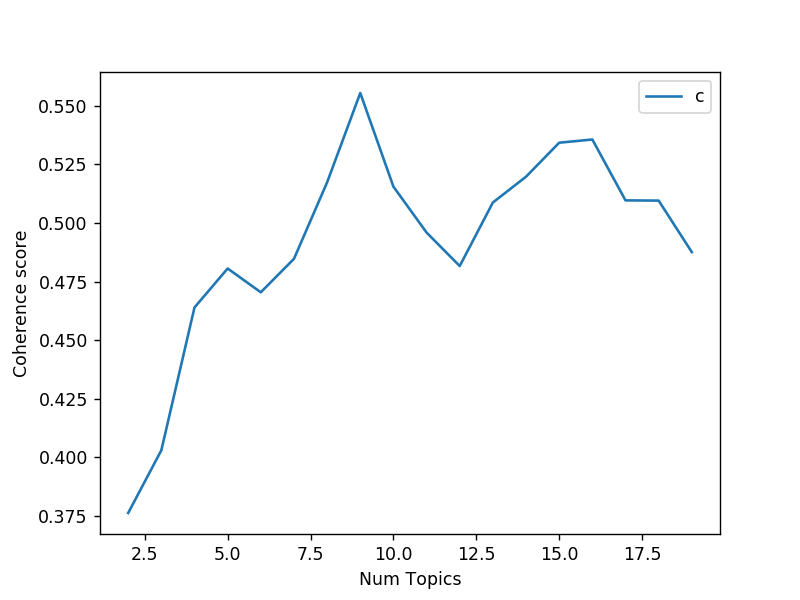

In [15]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

## Observation:

1) Optical number of topics: 10

In [16]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3762
Num Topics = 3  has Coherence Value of 0.403
Num Topics = 4  has Coherence Value of 0.4639
Num Topics = 5  has Coherence Value of 0.4806
Num Topics = 6  has Coherence Value of 0.4704
Num Topics = 7  has Coherence Value of 0.4847
Num Topics = 8  has Coherence Value of 0.5173
Num Topics = 9  has Coherence Value of 0.5555
Num Topics = 10  has Coherence Value of 0.5155
Num Topics = 11  has Coherence Value of 0.4959
Num Topics = 12  has Coherence Value of 0.4816
Num Topics = 13  has Coherence Value of 0.5088
Num Topics = 14  has Coherence Value of 0.5198
Num Topics = 15  has Coherence Value of 0.5343
Num Topics = 16  has Coherence Value of 0.5356
Num Topics = 17  has Coherence Value of 0.5097
Num Topics = 18  has Coherence Value of 0.5096
Num Topics = 19  has Coherence Value of 0.4876


In [16]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics()

In [17]:
optimal_model.print_topics()

[(0,
  '0.021*"opinion" + 0.021*"sentiment" + 0.015*"review" + 0.013*"word" + 0.013*"text" + 0.012*"document" + 0.009*"mining" + 0.009*"news" + 0.008*"social" + 0.008*"sentence"'),
 (1,
  '0.050*"stock" + 0.025*"market" + 0.022*"price" + 0.015*"game" + 0.008*"portfolio" + 0.007*"prediction" + 0.007*"currency" + 0.006*"financial" + 0.005*"trading" + 0.005*"artist"'),
 (2,
  '0.018*"security" + 0.017*"authentication" + 0.014*"network" + 0.014*"target" + 0.013*"attack" + 0.009*"hash" + 0.008*"lio" + 0.008*"message" + 0.007*"password" + 0.007*"file"'),
 (3,
  '0.009*"conference" + 0.008*"annexure" + 0.008*"assignment" + 0.007*"state" + 0.006*"document" + 0.006*"product" + 0.005*"keywords" + 0.005*"unit" + 0.005*"review" + 0.005*"journal"'),
 (4,
  '0.024*"crop" + 0.018*"plant" + 0.017*"leaf" + 0.013*"farmer" + 0.013*"disease" + 0.012*"agricultural" + 0.010*"yield" + 0.010*"soil" + 0.005*"ensemble" + 0.005*"agriculture"'),
 (5,
  '0.016*"server" + 0.013*"file" + 0.011*"cloud" + 0.010*"servi

In [18]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [20]:
%%time
pyLDAvis.gensim.prepare(optimal_model, corpus, id2word, mds='mmds')

C:\Users\sutar\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


Wall time: 15min 33s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.166242  0.253253       1        1  23.043852
7      0.024573 -0.085401       2        1  22.186604
5      0.231003  0.062051       3        1  19.967989
6      0.009258  0.126068       4        1  14.305263
8      0.077332 -0.278642       5        1  11.711793
2      0.330459 -0.132283       6        1   4.123813
0     -0.130707  0.288921       7        1   3.710275
1     -0.329544 -0.186380       8        1   0.541883
4     -0.378616 -0.047587       9        1   0.408531, topic_info=      Category          Freq            Term         Total  loglift  logprob
1077   Default  16248.000000           image  16248.000000  30.0000  30.0000
1888   Default   3702.000000          sensor   3702.000000  29.0000  29.0000
1463   Default   5164.000000          server   5164.000000  28.0000  28.0000
400    Default   3989.000000            node   3989.000000  27.0000  27.0000
1243   Default   7426.000000         network   7426.000000  26.0000  26.0000
240    Default   4477.000000            file   4477.000000  25.0000  25.0000
2470   Default   2600.000000          driver   2600.000000  24.0000  24.0000
2700   Default   2982.000000          review   2982.000000  23.0000  23.0000
910    Default   3645.000000        document   3645.000000  22.0000  22.0000
1374   Default   3442.000000     recognition   3442.000000  21.0000  21.0000
1446   Default   2076.000000        security   2076.000000  20.0000  20.0000
1704   Default   3330.000000           cloud   3330.000000  19.0000  19.0000
340    Default   5402.000000        learning   5402.000000  18.0000  18.0000
1739   Default   4766.000000       detection   4766.000000  17.0000  17.0000
569    Default   3113.000000            text   3113.000000  16.0000  16.0000
5250   Default   2796.000000        annexure   2796.000000  15.0000  15.0000
1322   Default   1523.000000      prediction   1523.000000  14.0000  14.0000
3023   Default   1135.000000         opinion   1135.000000  13.0000  13.0000
1650   Default   1803.000000            word   1803.000000  12.0000  12.0000
10289  Default   1131.000000       sentiment   1131.000000  11.0000  11.0000
697    Default   1247.000000  authentication   1247.000000  10.0000  10.0000
170    Default   3545.000000          device   3545.000000   9.0000   9.0000
1464   Default   3303.000000         service   3303.000000   8.0000   8.0000
1642   Default   3610.000000             web   3610.000000   7.0000   7.0000
5260   Default   2597.000000      assignment   2597.000000   6.0000   6.0000
563    Default   1259.000000          target   1259.000000   5.0000   5.0000
1159   Default   2649.000000             log   2649.000000   4.0000   4.0000
39     Default   3126.000000         android   3126.000000   3.0000   3.0000
180    Default   2371.000000     distributed   2371.000000   2.0000   2.0000
324    Default   1615.000000             job   1615.000000   1.0000   1.0000
...        ...           ...             ...           ...      ...      ...
3559    Topic9      4.024276        nutrient      4.884686   5.3066  -7.2795
47520   Topic9      3.961460           maize      4.822534   5.3037  -7.2952
47545   Topic9      3.961460           unseg      4.822534   5.3037  -7.2952
42785   Topic9      3.666563   industrialist      4.527760   5.2894  -7.3725
28645   Topic9      3.625216     fertigation      4.485641   5.2874  -7.3839
53193   Topic9      3.416508            attr      4.280747   5.2748  -7.4432
3638    Topic9      3.363241             rot      4.228872   5.2713  -7.4589
12994   Topic9      3.175300  meteorological      4.035707   5.2606  -7.5164
3385    Topic9     29.905560            farm     38.345535   5.2518  -5.2738
3183    Topic9     31.279709     agriculture     40.899193   5.2322  -5.2288
16408   Topic9     11.514827      greengrass     14.758697   5.2522  -6.2282
2203    Topic9    105.687752           plant    147.

In [21]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [22]:
%%time
df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=documents)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

Wall time: 18.2 s


In [23]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,8.0,0.6321,"sensor, driver, detection, device, vehicle, ca...","[integrated, spice, modeling, simulation, circ..."
1,1,7.0,0.6678,"image, recognition, network, learning, detecti...","[secure, online, payment, hiding, technique, s..."
2,2,7.0,0.9092,"image, recognition, network, learning, detecti...","[face, detection, recognisation, attendance, t..."
3,3,8.0,0.4388,"sensor, driver, detection, device, vehicle, ca...","[3d, image, scanner, nangare, akshay, arun, ra..."
4,4,7.0,0.9309,"image, recognition, network, learning, detecti...","[phase, attendance, face, recognition, sayali,..."
5,5,8.0,0.5244,"sensor, driver, detection, device, vehicle, ca...","[projectreport, pcb, segregation, technique, c..."
6,6,7.0,0.5282,"image, recognition, network, learning, detecti...","[leaf, disease, identification, grading, leaf,..."
7,7,8.0,0.7835,"sensor, driver, detection, device, vehicle, ca...","[smart, theaterical, light, control, rahul, ra..."
8,8,7.0,0.7460,"image, recognition, network, learning, detecti...","[2d, 3d, image, conversion, machine, learning,..."
9,9,5.0,0.5220,"server, file, cloud, service, log, web, androi...","[phase, rolling, display, sreeradh, sreekumar,..."


In [24]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,8.0,"sensor, driver, detection, device, vehicle, ca...",11.0,0.0215
1,7.0,"image, recognition, network, learning, detecti...",3.0,0.0059
2,7.0,"image, recognition, network, learning, detecti...",16.0,0.0313
3,8.0,"sensor, driver, detection, device, vehicle, ca...",145.0,0.2838
4,7.0,"image, recognition, network, learning, detecti...",NaN,NaN
5,8.0,"sensor, driver, detection, device, vehicle, ca...",92.0,0.1800
6,7.0,"image, recognition, network, learning, detecti...",60.0,0.1174
7,8.0,"sensor, driver, detection, device, vehicle, ca...",121.0,0.2368
8,7.0,"image, recognition, network, learning, detecti...",63.0,0.1233
9,5.0,"server, file, cloud, service, log, web, androi...",NaN,NaN


<IPython.core.display.Javascript object>


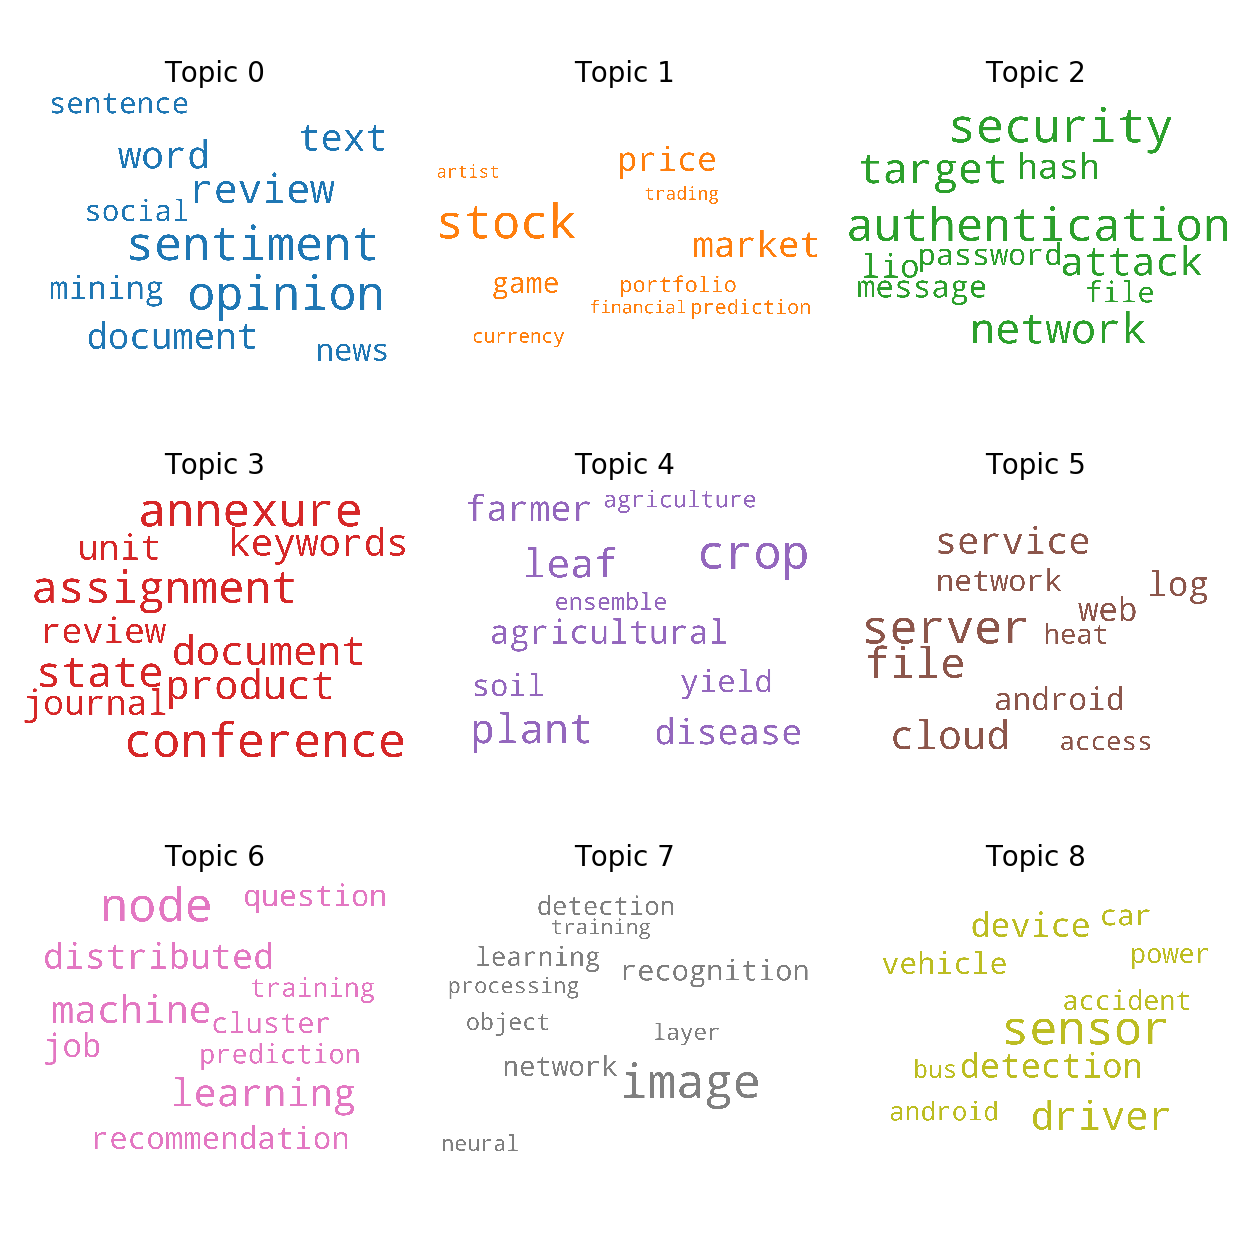

In [27]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = optimal_model.show_topics(formatted=False)

fig, axes = plt.subplots(3, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Observations

1) Topic 0: Sentiment analysis, reviews, news etc.<br>
2) Topic 1: Stock market<br>
3) Topic 2: May be related to security<br>
4) Topic 3: Don't know<br>
5) Topic 4: Agriculture.<br>
6) Topic 5: May be related to servers, cloud<br>
7) Topic 6: Distributed systems.<br>
8) Topic 7: Image processing, recognition<br>
9) Topic 8: Sensors<br>

In [28]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
from bokeh.resources import INLINE

# Get topic weights
topic_weights = []
for i, row_list in enumerate(optimal_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook(INLINE)
n_topics = 10
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 495 samples in 0.021s...
[t-SNE] Computed neighbors for 495 samples in 0.019s...
[t-SNE] Computed conditional probabilities for sample 495 / 495
[t-SNE] Mean sigma: 0.147310
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.537956
[t-SNE] KL divergence after 1000 iterations: 0.457951


Loading BokehJS ...

In [29]:
document_topic_feature_matrix = pd.merge(df_dominant_topic, df, left_index=True, right_index=True)[['Dominant_Topic', 'Topic_Perc_Contrib', 'project', 'file']]

In [30]:
import joblib

In [31]:
joblib.dump(document_topic_feature_matrix, "./models/document_topic_feature_matrix.pkl")

['./models/document_topic_feature_matrix.pkl']

In [32]:
optimal_model.save('./models/ldamodel')

In [33]:
id2word.save('./models/dictionary')